# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here

import pandas as pd
import numpy as np
import re

import requests as req
from bs4 import BeautifulSoup as bs

import json



In [2]:
pd.set_option('display.max_columns', None)  # display all columns
pd.set_option('display.max_rows', None)  # display all rows

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [3]:
# your answer here

temp = pd.read_csv("/Users/david/Desktop/IronHack/5.1-lab_subsetting_and_descriptive_stats/your-code/Temp_States.csv")

#### Print `temp`

In [4]:
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [5]:
# your answer here

# 2 objecto columns and 1 float column

temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [6]:
# your answer here

temp[temp["State"] == "New York"]


,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [7]:
# your answer here

temp[temp["State"] == "New York"].mean()


/var/folders/x2/68m0f_l16x5bzxl95_y3qn3m0000gp/T/ipykernel_28794/2407915226.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp[temp["State"] == "New York"].mean()


Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [8]:
# your answer here

temp[temp["Temperature"]>15]


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [9]:
# your answer here

temp.loc[temp["Temperature"] > 15, ["City", "Temperature"]]


,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [10]:
# your answer here

temp.loc[(temp["Temperature"]>15) & (temp["Temperature"]<20),["City","Temperature"]]


,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [11]:
# your answer here

temp.groupby("State")["Temperature"].mean()


State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [12]:
# your answer here

employee = pd.read_csv("/Users/david/Desktop/IronHack/5.1-lab_subsetting_and_descriptive_stats/your-code/Employee.csv")



#### Explore the data types of the Temp dataframe. Comment your results

In [13]:
# your answer here

employee


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [14]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [15]:
# your answer here
import matplotlib.pyplot as plt


(array([4., 3., 2.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

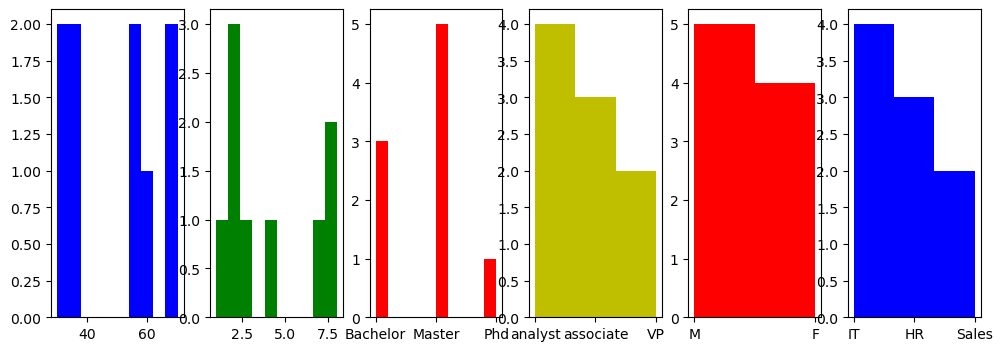

In [16]:
fig, axs = plt.subplots(1, 6, figsize=(12, 4))
axs[0].hist(employee['Salary'], color = 'b', bins= 10)
axs[1].hist(employee['Years'], color = 'g', bins= 10)
axs[2].hist(employee['Education'], color = 'r', bins= 10)
axs[3].hist(employee['Title'], color = 'y', bins= 3)
axs[4].hist(employee['Gender'], color = 'r', bins= 2)
axs[5].hist(employee['Department'], color = 'b', bins= 3)


#### What's the average salary in this company?

In [17]:
# your answer here

employee["Salary"].mean()


48.888888888888886

#### What's the highest salary?

In [18]:
# your answer here

employee["Salary"].max()

70

#### What's the lowest salary?

In [19]:
# your answer here

employee["Salary"].min()


30

#### Who are the employees with the lowest salary?

In [20]:
# your answer here

employee.loc[employee["Salary"] == employee["Salary"].min(), "Name"]

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [22]:
# your answer here

employee[employee['Name'] == 'David']


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [24]:
# your answer here

employee["Salary"][employee["Name"]=="David"]


2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [28]:
# your answer here

employee[employee["Title"]=="associate"]


,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [29]:
# your answer here- 1 method

employee[0:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [30]:
# your answer here- 2nd method

employee.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [34]:
# your answer here

employee[(employee["Title"]=="associate") & (employee["Salary"]>55)]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [42]:
# your answer here

employee.groupby("Years").mean()

/var/folders/x2/68m0f_l16x5bzxl95_y3qn3m0000gp/T/ipykernel_28794/1945237073.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  employee.groupby("Years").mean()


,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


In [41]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


####  What is the average Salary per title?

In [48]:
# your answer here


avg = employee.groupby("Title")["Salary"].mean()

avg



Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

{'whiskers': [<matplotlib.lines.Line2D at 0x136290250>,
 'caps': [<matplotlib.lines.Line2D at 0x136290790>,
 'boxes': [<matplotlib.lines.Line2D at 0x136277eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x136290cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x136290f70>],
 'means': []}

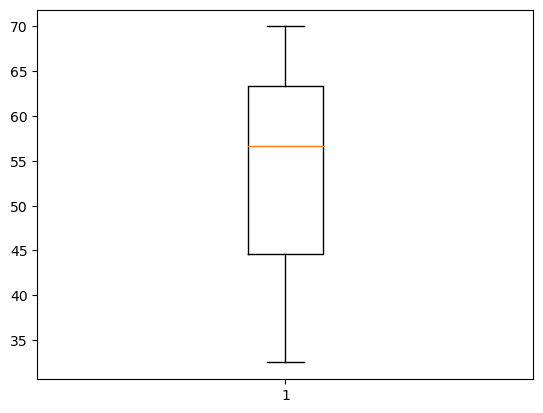

In [51]:
# draw boxplot here

plt.boxplot(avg)


In [53]:
# print first quartile here

avg.quantile(0.25)


44.58333333333333

In [54]:
# print third quartile here


avg.quantile(0.75)

63.33333333333333

#### Is the mean salary per gender different?

In [55]:
# your answer here

employee.groupby('Gender')['Salary'].mean()


Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [76]:
# your answer here

employee.groupby("Department").agg({'Salary': ['min', 'max', 'mean']})


Salary           
              min max   mean
Department                  
HR             30  70  45.00
IT             30  70  48.75
Sales          55  55  55.00

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [ ]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [77]:
# your answer here

import zipfile
zip_file_path = 'Orders.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    extracted_file = zip_ref.extract('Orders.csv')
    orders = pd.read_csv(extracted_file)

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [80]:
# your answer here


orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [81]:
# your answer here

orders.head()



,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


####  What is the average Purchase Price?

In [82]:
# your answer here

orders.amount_spent.mean()



22.394748504739596

#### What were the highest and lowest purchase prices? 

In [83]:
# your answer here


orders.amount_spent.max()



168469.6

In [84]:
# your answer here

orders.amount_spent.min()



0.0

#### Select all the customers we have in Spain

In [86]:
# your answer here

orders[orders['Country']== 'Spain'].head()



,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [87]:
# your answer here


orders[orders['Country'] == 'Spain']['CustomerID'].value_counts().sum()



2485

#### Select all the customers who have bought more than 50 items ?

In [89]:
# your answer here

orders[orders['Quantity'] > 50 ]['CustomerID'].head()



46     13748
83     15291
96     14688
102    14688
174    16029
Name: CustomerID, dtype: int64

#### Select orders from Spain that are above 50 items

In [90]:
# your answer here


orders[(orders['Quantity'] > 50) & (orders['Country'] == 'Spain') ].head()



,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [91]:
# your answer here

orders[orders['amount_spent']== 0].head()



,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [92]:
# your answer here


orders[orders['Description'].str.contains('lunch bag')].head()


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [93]:
# your answer here

orders[(orders['Description'].str.contains('lunch bag'))& (orders['year']==2011)].head()



,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

In [95]:
# your answer here


orders[orders['Country'] == 'Spain']['amount_spent'].value_counts().head()



15.0    186
17.7    122
17.4     86
10.2     76
19.8     72
Name: amount_spent, dtype: int64

#### Select all orders made in the month of August

In [96]:
# your answer here

orders[orders['month'] == 8].head()




,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [97]:
# your answer here


orders[orders['month'] == 8]['Country'].value_counts().head()



United Kingdom    23105
Germany             795
EIRE                593
France              569
Netherlands         280
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [98]:
# your answer here

orders.groupby('Country')['amount_spent'].mean().head()




Country
Australia    116.895620
Austria       25.624824
Bahrain       32.258824
Belgium       20.283772
Brazil        35.737500
Name: amount_spent, dtype: float64

#### What's the most expensive item?

In [99]:
# your answer here

orders['UnitPrice'].max()



8142.75

#### What was the average amount spent per year ?

In [100]:
# your answer here

orders.groupby('year')['amount_spent'].mean().head()



year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64